In [419]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D


In [45]:
ruta = 'C:/Users/beneg/OneDrive/Desktop/dataset_regresion_lineal.csv '

In [47]:
df = pd.read_csv(ruta)

In [49]:
df

,tamaño_m2,habitaciones,baños,distancia_centro_km,años_antiguedad,precio
0,152,3,1,8.922540,48,4.476049e+05
1,485,1,2,11.357395,9,1.314610e+06
2,398,5,3,11.842966,44,1.287943e+06
3,320,4,2,17.197778,29,9.634162e+05
4,156,5,2,6.512931,32,6.118610e+05
...,...,...,...,...,...,...
9995,417,2,3,16.441020,44,1.141205e+06
9996,261,5,1,16.902527,17,8.523879e+05
9997,114,2,2,8.698500,6,4.240904e+05
9998,498,1,1,17.417218,29,1.348316e+06


In [137]:
df['precio'] = df['precio'].astype(int)

In [143]:
type(df['precio'][0])

numpy.int32

In [145]:
df.isnull().sum()

tamaño_m2              0
habitaciones           0
baños                  0
distancia_centro_km    0
años_antiguedad        0
precio                 0
dtype: int64

In [147]:
df.shape

(10000, 6)

In [149]:
df.head()

,tamaño_m2,habitaciones,baños,distancia_centro_km,años_antiguedad,precio
0,152,3,1,8.922540,48,447604
1,485,1,2,11.357395,9,1314610
2,398,5,3,11.842966,44,1287943
3,320,4,2,17.197778,29,963416
4,156,5,2,6.512931,32,611861


In [151]:
df.tail()

,tamaño_m2,habitaciones,baños,distancia_centro_km,años_antiguedad,precio
9995,417,2,3,16.441020,44,1141204
9996,261,5,1,16.902527,17,852387
9997,114,2,2,8.698500,6,424090
9998,498,1,1,17.417218,29,1348316
9999,258,1,2,10.755769,13,723579


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tamaño_m2            10000 non-null  int64  
 1   habitaciones         10000 non-null  int64  
 2   baños                10000 non-null  int64  
 3   distancia_centro_km  10000 non-null  float64
 4   años_antiguedad      10000 non-null  int64  
 5   precio               10000 non-null  int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 429.8 KB


In [155]:
df.describe() #estadistica descriptiba antes de normalizar nuestros valores

,tamaño_m2,habitaciones,baños,distancia_centro_km,años_antiguedad,precio
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,275.577300,2.993900,2.00970,10.252093,24.454900,8.851079e+05
std,130.781051,1.420023,0.81699,5.596484,14.452891,4.076525e+05
min,50.000000,1.000000,1.00000,0.500938,0.000000,-7.340400e+04
25%,162.000000,2.000000,1.00000,5.457252,12.000000,5.507148e+05
50%,273.500000,3.000000,2.00000,10.288587,25.000000,8.793210e+05
75%,390.000000,4.000000,3.00000,15.031830,37.000000,1.224247e+06
max,499.000000,5.000000,3.00000,19.998069,49.000000,1.789038e+06


In [157]:
columnas_a_normalizar = ["tamaño_m2", "habitaciones", "baños", "distancia_centro_km", "años_antiguedad","precio"]

# Crear el escalador y aplicarlo
scalado = MinMaxScaler()
df_normalizado = df.copy()
df_normalizado[columnas_a_normalizar] = scalado.fit_transform(df[columnas_a_normalizar])

df_normalizado.head() # valores ya normalizados

,tamaño_m2,habitaciones,baños,distancia_centro_km,años_antiguedad,precio
0,0.227171,0.50,0.0,0.431941,0.979592,0.279745
1,0.968820,0.00,0.5,0.556823,0.183673,0.745266
2,0.775056,1.00,1.0,0.581728,0.897959,0.730947
3,0.601336,0.75,0.5,0.856374,0.591837,0.556699
4,0.236080,1.00,0.5,0.308353,0.653061,0.367939


In [495]:
X = df[["tamaño_m2","habitaciones","baños"]]
y = df["precio"]

In [497]:
X

,tamaño_m2,habitaciones,baños
0,152,3,1
1,485,1,2
2,398,5,3
3,320,4,2
4,156,5,2
...,...,...,...
9995,417,2,3
9996,261,5,1
9997,114,2,2
9998,498,1,1


In [569]:
maximo = df["habitaciones"].max()

In [571]:
maximo

5

In [499]:
y

0        447604
1       1314610
2       1287943
3        963416
4        611861
         ...   
9995    1141204
9996     852387
9997     424090
9998    1348316
9999     723579
Name: precio, Length: 10000, dtype: int32

In [501]:
#df.plot(kind = 'scatter', x ='tamaño_m2', y= 'precio' , alpha = 0.4)#2DO CREAMOS EL GRAFICO
#plt.grid();
 

In [503]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y , train_size=0.8 ,random_state=42 )

In [505]:
#plt.scatter(X_entrena,y_entrena, label = 'Datos entrenamiento' , color='r' , alpha = 0.7)
#plt.scatter(X_prueba,y_prueba, label = 'Datos prueba' , color='g' , alpha = 0.7)
#plt.legend()
#plt.grid();

In [507]:
modelo = LinearRegression()
modelo.fit(X_entrena,y_entrena) # entrenamos el modelo

LinearRegression()

In [509]:
modelo_entrenamiento = modelo.score(X_entrena,y_entrena) # probamos los datos de prueba, nos da un porcentaje muy alto, pareciera que el modelo esta bien entrenado, y sus valores bien ajustados

In [511]:
modelo_entrenamiento

0.9610280736543627

In [513]:
modelo_prueba = modelo.score(X_prueba,y_prueba) # probamos los datos de prueba, nos da un porcentaje muy alto, pareciera que el modelo esta bien entrenado 


In [515]:
modelo_prueba

0.9590040970239947

In [517]:
prediccion = modelo.predict(X)

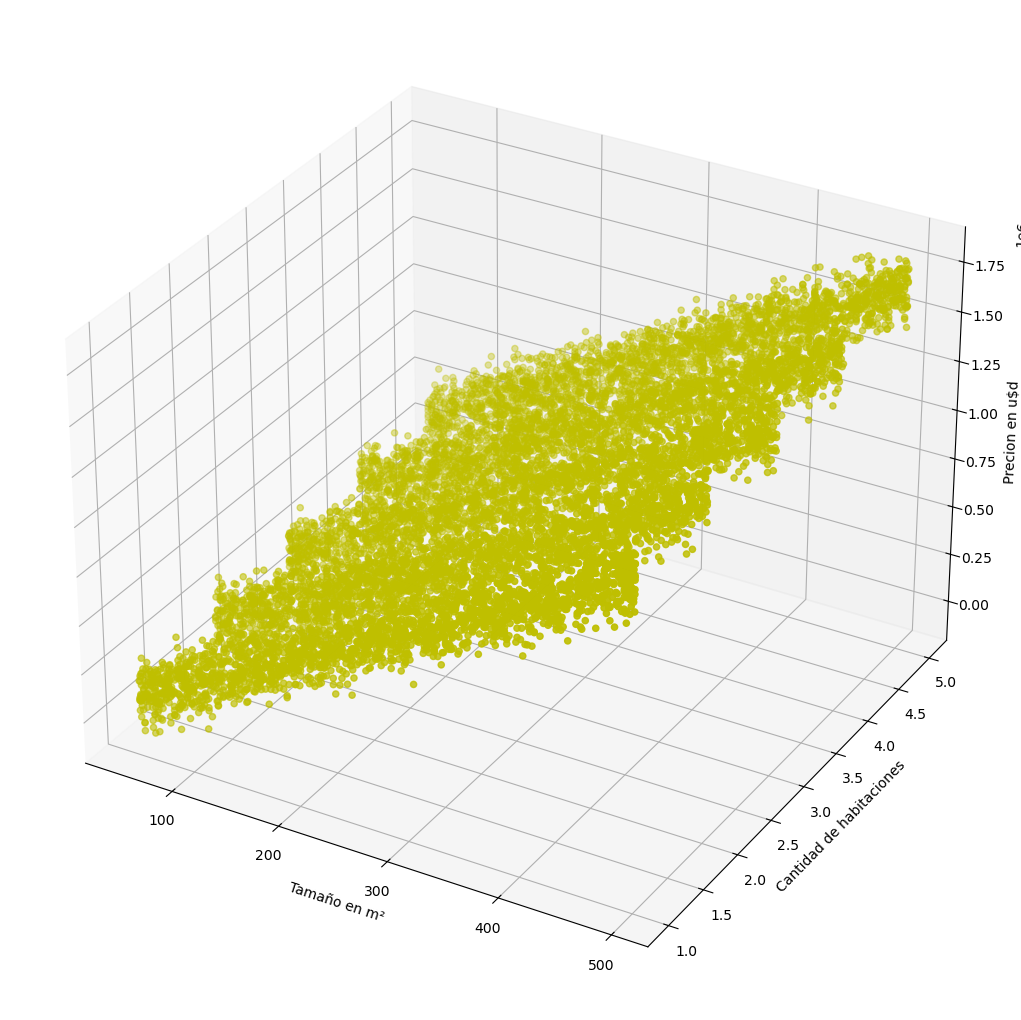

In [555]:



# Crear una figura para el gráfico 3D
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')

# Datos de X para el gráfico
x = df['tamaño_m2']
y = df['habitaciones']
z = df['precio']

# Graficar los puntos de datos
ax.scatter(x, y, z, c='y', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Tamaño en m²')
ax.set_ylabel('Cantidad de habitaciones')
ax.set_zlabel('Precion en u$d')

plt.show()


In [565]:

tamaño = float(input("Ingresa el tamaño en metros cuadrados para la predicción: "))
habitaciones = int(input("Ingresa el número de habitaciones: "))
baños = int(input("Ingresa la cantidad de baños: "))
# Realizar la predicción
prediccion_final = modelo.predict([[tamaño, habitaciones, baños]])
prediccion_redondeada = round(prediccion_final[0])

Ingresa el tamaño en metros cuadrados para la predicción:  300
Ingresa el número de habitaciones:  2
Ingresa la cantidad de baños:  1


C:\Users\beneg\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [567]:
print(f"El valor de esta propieda esta estimada en: U$D {prediccion_redondeada} ")

El valor de esta propieda esta estimada en: U$D 880579 
